# Hiring Task - 2

### Submitted by : Tanveer Mahammad Shikalgar (tanveershikalgar55@gmail.com)

 
**Task**: The below dataset contains covid 19 data for the whole world, complete the
following tasks and submit the google colab notebook.

    Dataset : https://ourworldindata.org/coronavirus-source-data

## Preparing and Understanding data

In [1]:
#Import all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('owid-covid-data.csv',parse_dates=['date'],index_col=['date'])
df.head()

,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
date,,,,,,,,,,,,,,,,,,,,,
2020-02-24,AFG,Asia,Afghanistan,5.0,5.0,NaN,NaN,NaN,NaN,0.126,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2020-02-25,AFG,Asia,Afghanistan,5.0,0.0,NaN,NaN,NaN,NaN,0.126,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2020-02-26,AFG,Asia,Afghanistan,5.0,0.0,NaN,NaN,NaN,NaN,0.126,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2020-02-27,AFG,Asia,Afghanistan,5.0,0.0,NaN,NaN,NaN,NaN,0.126,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2020-02-28,AFG,Asia,Afghanistan,5.0,0.0,NaN,NaN,NaN,NaN,0.126,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN


In [3]:
df.columns

Index(['iso_code', 'continent', 'location', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       'total_vac

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 117021 entries, 2020-02-24 to 2021-09-15
Data columns (total 61 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   iso_code                               117021 non-null  object 
 1   continent                              111668 non-null  object 
 2   location                               117021 non-null  object 
 3   total_cases                            111277 non-null  float64
 4   new_cases                              111274 non-null  float64
 5   new_cases_smoothed                     110259 non-null  float64
 6   total_deaths                           100616 non-null  float64
 7   new_deaths                             100771 non-null  float64
 8   new_deaths_smoothed                    110259 non-null  float64
 9   total_cases_per_million                110690 non-null  float64
 10  new_cases_per_million                  1

In [5]:
df = df.fillna(0)
df.isna().sum()

iso_code                      0
continent                     0
location                      0
total_cases                   0
new_cases                     0
                             ..
handwashing_facilities        0
hospital_beds_per_thousand    0
life_expectancy               0
human_development_index       0
excess_mortality              0
Length: 61, dtype: int64

Conclusion : All NULL values are filled with zero. Now data is ready to explore.

## 1. Find the country/countries with most number of deaths and cases and also provide the values for the same.

In [6]:
max_cases = df[['location','total_cases','total_deaths']]
print(max_cases[['location','total_cases']].max())
print(max_cases[['location','total_deaths']].max())

location          Zimbabwe
total_cases    226478640.0
dtype: object
location         Zimbabwe
total_deaths    4659842.0
dtype: object


Conclusion : we can observe that zimbabwe has maximum number of total cases and death cases

## 2. Find the total number of cases and deaths in India

In [7]:
india = df[df['location']=='India']
india.head()

,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
date,,,,,,,,,,,,,,,,,,,,,
2020-01-30,IND,Asia,India,1.0,1.0,0.0,0.0,0.0,0.0,0.001,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,0.0
2020-01-31,IND,Asia,India,1.0,0.0,0.0,0.0,0.0,0.0,0.001,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,0.0
2020-02-01,IND,Asia,India,1.0,0.0,0.0,0.0,0.0,0.0,0.001,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,0.0
2020-02-02,IND,Asia,India,2.0,1.0,0.0,0.0,0.0,0.0,0.001,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,0.0
2020-02-03,IND,Asia,India,3.0,1.0,0.0,0.0,0.0,0.0,0.002,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,0.0


In [8]:
print(india[['location','total_cases']].max())
print(india[['location','total_deaths']].max())

location            India
total_cases    33347325.0
dtype: object
location           India
total_deaths    443928.0
dtype: object


Conclusion : Here we found total cases and total deaths occured in India

## 3. Use FbProphet to forecast the number of cases for the next 30 days and plot the graph for the same ( V. imp)

In [60]:
data = df.groupby(df.index).sum()
data.head()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
date,,,,,,,,,,,,,,,,,,,,,
2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.6,429.570,24.51,27.9,49.1,87.847,7.98,228.46,2.401,0.00
2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.6,429.570,24.51,27.9,49.1,87.847,7.98,228.46,2.401,0.00
2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.6,429.570,24.51,27.9,49.1,87.847,7.98,228.46,2.401,0.00
2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.7,539.431,31.55,29.8,87.9,178.517,10.08,305.61,3.178,0.00
2020-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.7,539.431,31.55,29.8,87.9,178.517,10.08,305.61,3.178,13.38


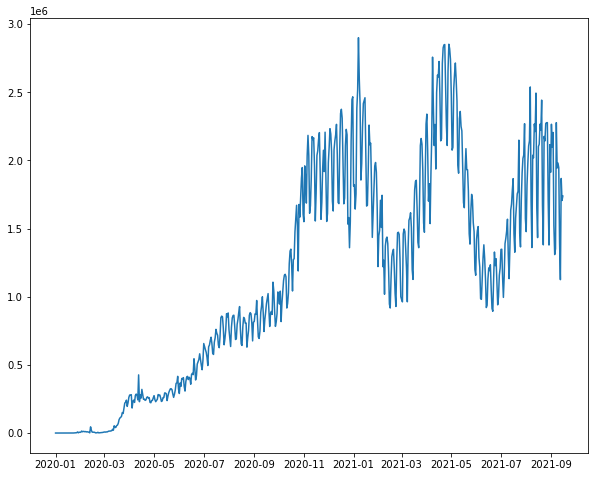

In [61]:
plt.figure(figsize=(10,8))
plt.plot(data['new_cases'])

In [117]:
# columns should be renamed as   :   ds->datetime and y->value
new_data = pd.DataFrame({'ds':data.index, 'y':data.values})
new_data['ds']= pd.to_datetime(new_data['ds'])
new_data

,ds,y
0,2020-10-01,1003221.0
1,2020-10-02,946478.0
2,2020-10-03,1040799.0
3,2020-10-04,817674.0
4,2020-10-05,951528.0
...,...,...
345,2021-09-11,1396341.0
346,2021-09-12,1125054.0
347,2021-09-13,1867582.0
348,2021-09-14,1706194.0


In [105]:
# ! conda install -c conda-forge fbprophet 
!pip install fbprophet

I've had the same problem. But it works after I follow this steps in prompt:

On Prompt install Ephem:
    
    conda install -c anaconda ephem

Install Pystan:

    conda install -c conda-forge pystan

Finally install Fbprophet
    
    conda install -c conda-forge fbprophet

In [118]:
from fbprophet import Prophet
# define the model
model = Prophet()
# fit the model
model.fit(new_data)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [119]:
#Creatin future 30 dates for prediction in dataframe.
future = model.make_future_dataframe(periods=30)
future.tail()

,ds
375,2021-10-11
376,2021-10-12
377,2021-10-13
378,2021-10-14
379,2021-10-15


In [120]:
pred = model.predict(future)
pred

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-10-01,1.605510e+06,1.271800e+06,2.356968e+06,1.605510e+06,1.605510e+06,207870.016939,207870.016939,207870.016939,207870.016939,207870.016939,207870.016939,0.0,0.0,0.0,1.813380e+06
1,2020-10-02,1.607583e+06,1.248654e+06,2.335109e+06,1.607583e+06,1.607583e+06,201996.098707,201996.098707,201996.098707,201996.098707,201996.098707,201996.098707,0.0,0.0,0.0,1.809579e+06
2,2020-10-03,1.609656e+06,9.771666e+05,2.121369e+06,1.609656e+06,1.609656e+06,-79931.656969,-79931.656969,-79931.656969,-79931.656969,-79931.656969,-79931.656969,0.0,0.0,0.0,1.529724e+06
3,2020-10-04,1.611729e+06,7.623332e+05,1.832717e+06,1.611729e+06,1.611729e+06,-332702.354495,-332702.354495,-332702.354495,-332702.354495,-332702.354495,-332702.354495,0.0,0.0,0.0,1.279026e+06
4,2020-10-05,1.613802e+06,8.449423e+05,1.962775e+06,1.613802e+06,1.613802e+06,-217234.624633,-217234.624633,-217234.624633,-217234.624633,-217234.624633,-217234.624633,0.0,0.0,0.0,1.396567e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,2021-10-11,1.746595e+06,9.848750e+05,2.040925e+06,1.743944e+06,1.749121e+06,-217234.624634,-217234.624634,-217234.624634,-217234.624634,-217234.624634,-217234.624634,0.0,0.0,0.0,1.529361e+06
376,2021-10-12,1.746479e+06,1.259900e+06,2.290021e+06,1.743669e+06,1.749247e+06,33559.751241,33559.751241,33559.751241,33559.751241,33559.751241,33559.751241,0.0,0.0,0.0,1.780038e+06
377,2021-10-13,1.746362e+06,1.376170e+06,2.451344e+06,1.743405e+06,1.749355e+06,186442.769211,186442.769211,186442.769211,186442.769211,186442.769211,186442.769211,0.0,0.0,0.0,1.932804e+06
378,2021-10-14,1.746245e+06,1.426648e+06,2.486859e+06,1.743086e+06,1.749395e+06,207870.016939,207870.016939,207870.016939,207870.016939,207870.016939,207870.016939,0.0,0.0,0.0,1.954115e+06


yhat means the predicted output based on the input fed to the model, 

yhat_lower, and upper means the upper and lower value that can go based on the predicted output that is, the fluctuations that can happen.

In [121]:
pred[['ds','yhat','yhat_lower','yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2020-10-01,1.813380e+06,1.271800e+06,2.356968e+06
1,2020-10-02,1.809579e+06,1.248654e+06,2.335109e+06
2,2020-10-03,1.529724e+06,9.771666e+05,2.121369e+06
3,2020-10-04,1.279026e+06,7.623332e+05,1.832717e+06
4,2020-10-05,1.396567e+06,8.449423e+05,1.962775e+06


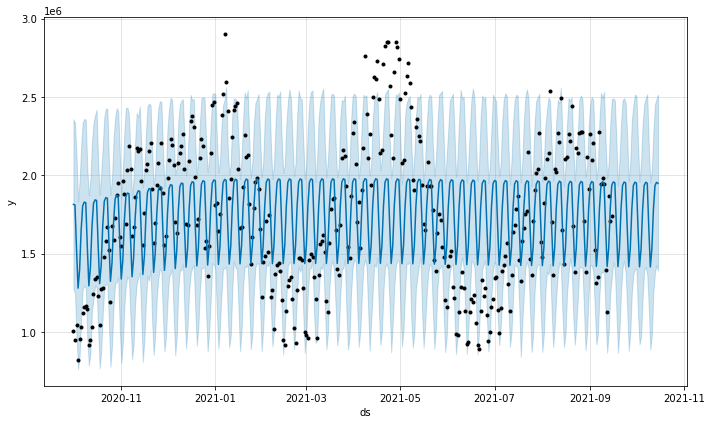

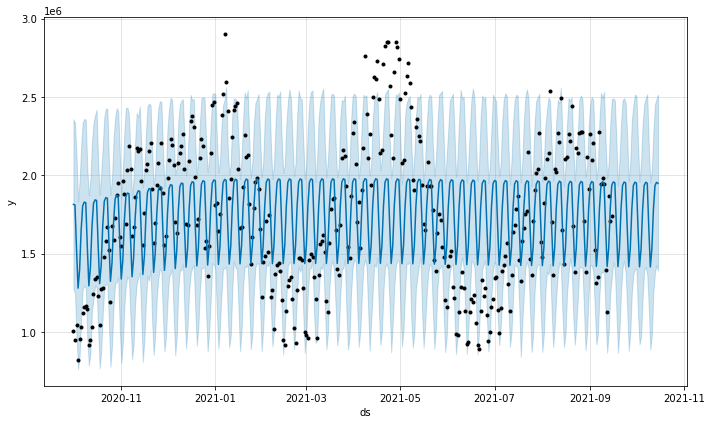

In [127]:
model.plot(pred)

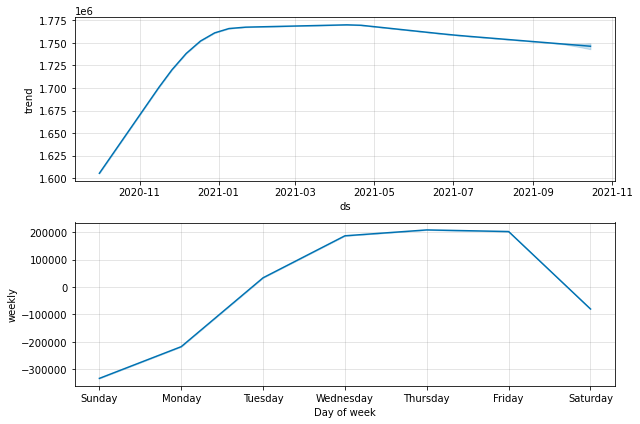

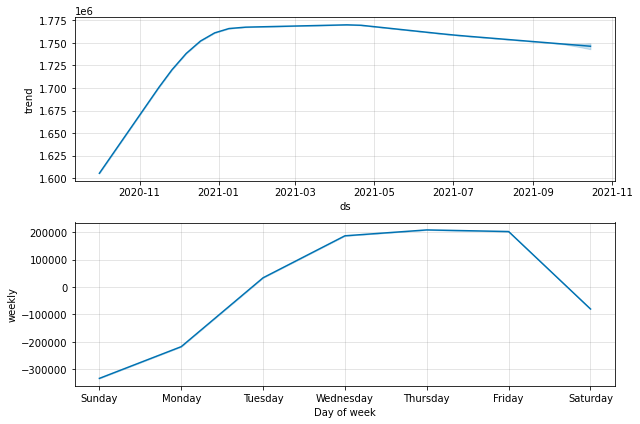

In [128]:
model.plot_components(pred)

## 4. Use matplotlib/seaborn to plot the monthly trend of covid 19 cases starting from 1st Oct 2020

In [62]:
data = data.loc['2020-10-01':,'new_cases']
data.head()

date
2020-10-01    1003221.0
2020-10-02     946478.0
2020-10-03    1040799.0
2020-10-04     817674.0
2020-10-05     951528.0
Name: new_cases, dtype: float64

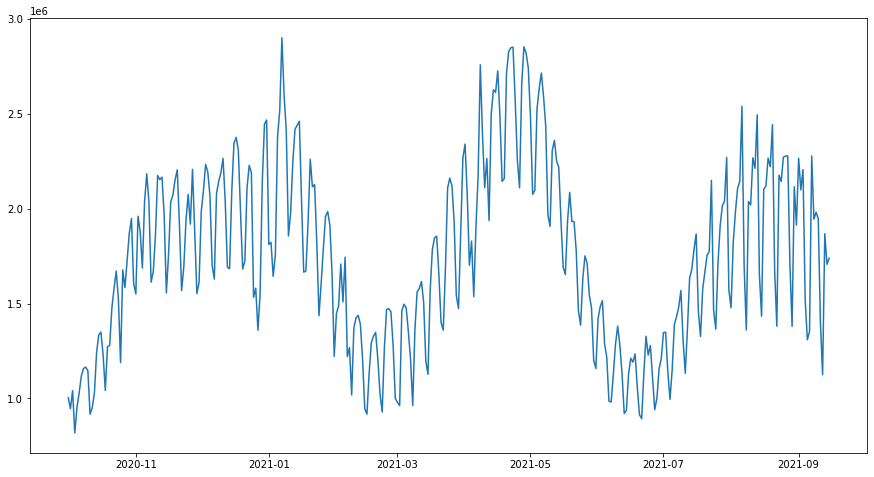

In [63]:
plt.figure(figsize=(15,8))
plt.plot(data)

In [64]:
#resample monthly
month_data = data.resample("M").max()
month_data.head()

date
2020-10-31    1947646.0
2020-11-30    2207046.0
2020-12-31    2466745.0
2021-01-31    2900335.0
2021-02-28    1744197.0
Freq: M, Name: new_cases, dtype: float64

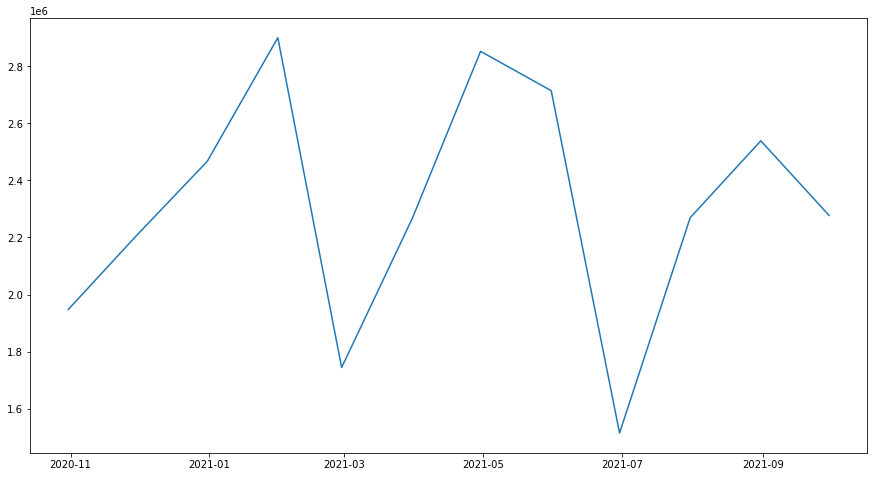

In [65]:
plt.figure(figsize=(15,8))
plt.plot(month_data)

In [74]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(x = data, model = 'multiplicative',freq = 20)


<ipython-input-74-4d0e208fb621>:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomposition = seasonal_decompose(x = data, model = 'multiplicative',freq = 20)


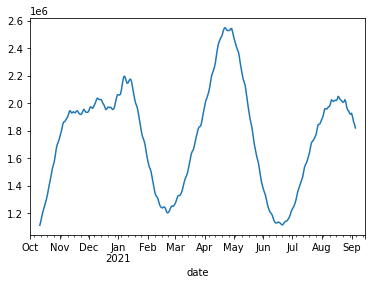

In [75]:
fig = decomposition.trend.plot()